In [47]:
from QCNN_circuit import QCNN
import data
import embedding
import matplotlib.pyplot as plt
import numpy as np
from Training import circuit_training
from Benchmarking import accuracy_test, round_predictions_f
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [48]:
"""
Here are possible combinations of benchmarking user could try.
Unitaries: ['U_TTN', 'U2_equiv', 'U4_equiv', 'U_5', 'U_6', 'U_9', 'U_13', 'U_14', 'U_15', 'U_SO4', 'U_SU4', 'U_SU4_no_pooling', 'U_SU4_1D', 'U_9_1D']
U_num_params: [2, 6, 6, 10, 10, 2, 6, 6, 4, 6, 15, 15, 15, 2]
Encodings: ['img16x16x1','resize256', 'pca8', 'autoencoder8', 'pca16-compact', 'autoencoder16-compact', 'pca32-1', 'autoencoder32-1',
            'pca16-1', 'autoencoder16-1', 'pca30-1', 'autoencoder30-1', 'pca12-1', 'autoencoder12-1']
dataset: 'mnist' or 'fashion_mnist'
circuit: 'QCNN' or 'Hierarchical'
cost_fn: 'mse' or 'cross_entropy'
Note: when using 'mse' as cost_fn binary="True" is recommended, when using 'cross_entropy' as cost_fn must be binary="False".
"""

# invariant testings

# U4_equiv is not invariant with mse cost function
# U4_equiv is invariant only under reflections over Y and almost X using cross_entropy

# U2_equiv is invariant under p4m using MSE
# U2_equiv is invariant under reflections over X using cross_entropy 


params = np.random.random(18)
U_params = 6
U = "U2_equiv"
embedding_type = "Equivariant-Amplitude"
circuit = "QCNN"
cost_fn = "mse"
binary = True

X_train, X_test, Y_train, Y_test = data.data_load_and_process( "mnist", [0,1], "img16x16x1", binary)

print(X_train.shape)

(12665, 16, 16, 1)


In [49]:
#data and transformed data
matrix = np.array(X_train[0])
matrix_reflected_y = np.fliplr(matrix) # Image Reflected over Y-axis
matrix_reflected_x = np.flipud(matrix) # Image Reflected over X-axis
matrix_rotated_90 = np.rot90(matrix) # Image rotated 90 degrees


result1 = QCNN(matrix, params, U, U_params, embedding_type, cost_fn)
result2 = QCNN(matrix_reflected_y, params,U, U_params, embedding_type, cost_fn)
result3 = QCNN(matrix_reflected_x, params, U, U_params, embedding_type, cost_fn)
result4 = QCNN(matrix_rotated_90, params, U, U_params, embedding_type, cost_fn)

print(f" Output with Probabilities for Original Image: {result1}")
print(f" Output with Probabilities for Image Reflected over Y-axis: {result2}")
print(f" Output with Probabilities for Image Reflected over X-axis: {result3}")
print(f" Output with Probabilities for Image Rotated 90 Degrees: {result4}")

 Output with Probabilities for Original Image: 0.06483959990126581
 Output with Probabilities for Image Reflected over Y-axis: 0.06483959990126581
 Output with Probabilities for Image Reflected over X-axis: 0.06483959990126581
 Output with Probabilities for Image Rotated 90 Degrees: 0.06483959990126588


In [50]:
# train for 10 epochs
loss_history, trained_params = circuit_training(X_train, Y_train, U, U_params, embedding_type, circuit, cost_fn, steps = 25)

iteration:  0  cost:  1.2192528715213948
iteration:  5  cost:  0.9948940972985173
iteration:  10  cost:  0.954610245179218
iteration:  15  cost:  0.8868525865725094
iteration:  20  cost:  0.8218342198358332


In [51]:
predictions = [QCNN(x, trained_params, U, U_params, embedding_type, cost_fn) for x in X_test]

accuracy = accuracy_test(predictions, Y_test, cost_fn, binary)
accuracy

0.9536643026004729

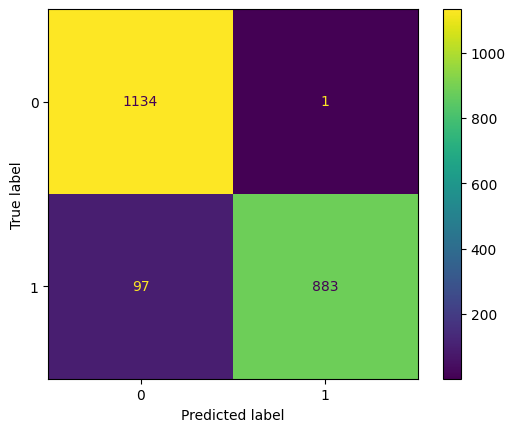

In [52]:
round_predictions = round_predictions_f(predictions, cost_fn)

cm = confusion_matrix(Y_test, round_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()